In [1]:
import sys
import importlib
#importlib.reload(ppaa)

sys.path.append('/home/khlee/dopamine/core')
from ppaa import *

sys.path.append('/home/khlee/repositories/pia-x/coupler/scripts')
from run import *
from _heatmap import *

print (sys.version)


3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]


In [2]:
# configuration

# number of unit

## Gi case
PDB_1="infiles/d3_gi_pd_mod.pdb"
DCDs_1=glob.glob('infiles/test_d3_gi_pd_*.dcd')
u_1 = mda.Universe(PDB_1, DCDs_1)


## Go case
PDB_2="infiles/d3_go_pd_mod.pdb"
DCDs_2=glob.glob('infiles/test_d3_go_pd_*.dcd')
u_2 = mda.Universe(PDB_2, DCDs_2)


In [3]:
## first calculation

df_1=get_df_contacts_frequency(u_1, chainid1="R", chainid2="A")
df_2=get_df_contacts_frequency(u_2, chainid1="R", chainid2="A")
df_ga_1=get_df_contacts_frequency(u_1, chainid1="A", chainid2="R")
df_ga_2=get_df_contacts_frequency(u_2, chainid1="A", chainid2="R")


TIMER: Function completed time is: 9.19372
TIMER: Function completed time is: 9.16018
TIMER: Function completed time is: 7.17355
TIMER: Function completed time is: 7.06340


In [13]:
df_gb_1=get_df_contacts_frequency(u_1, chainid1="B", chainid2="R")
df_gb_2=get_df_contacts_frequency(u_2, chainid1="B", chainid2="R")

TIMER: Function completed time is: 9.94849
TIMER: Function completed time is: 9.83695


In [4]:
t1 = time.time()

# get union from different targets
common_rec = get_union(df_1, df_2)
common_ga = get_union(df_ga_1, df_ga_2)
# update to dataframes with common resids
df_1c=get_union_df(df_1,common_rec)
df_2c=get_union_df(df_2,common_rec)
df_ga_1c=get_union_df(df_ga_1,common_ga)
df_ga_2c=get_union_df(df_ga_2,common_ga)

t2 = time.time()
print("TIMER: Function completed time is: %.5f" % (t2 - t1))


TIMER: Function completed time is: 0.20245


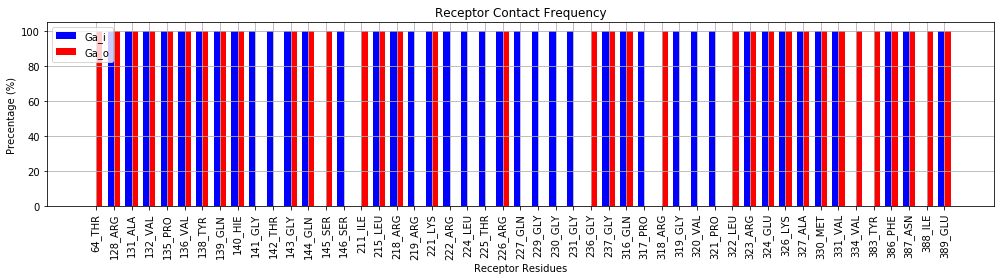

In [5]:
show1d_freq(df_1c, df_2c, title='Receptor Contact Frequency')

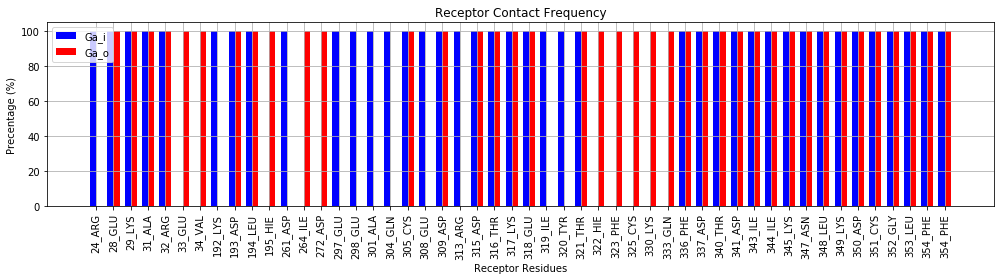

In [6]:
show1d_freq(df_ga_1c, df_ga_2c, title='Receptor Contact Frequency')

In [7]:
matrix_1,matrix_sd_1,matrix_freq_1=get_dist_freq_matrix(u_1,common_rec,common_ga)
matrix_2,matrix_sd_2,matrix_freq_2=get_dist_freq_matrix(u_2,common_rec,common_ga)

TIMER: Function completed time is: 13.45648
TIMER: Function completed time is: 13.40853


In [8]:
matrix_diff=get_matrix_diff(matrix_freq_1, matrix_freq_2)

Text(0, 0.5, 'Rec')

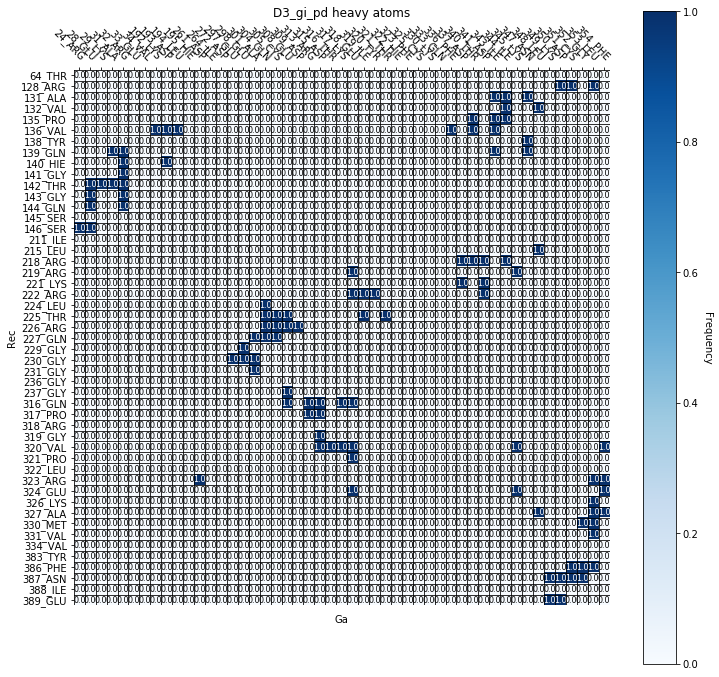

In [9]:
xlabels, ylabels, x_axis_label, y_axis_label = get_labels(u_1, common_rec, common_ga)

plt.figure(figsize=(12,12))
plot_index = 1
ax = plt.subplot(1, 1, plot_index)
im,cbar = heatmap(matrix_freq_1,xlabels, ylabels,ax=ax,cmap="Blues", cbarlabel="Frequency")
texts = annotate_heatmap(im, valfmt="{x:.1f}", size=8)
ax.set_title('D3_gi_pd heavy atoms')
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)


Text(0, 0.5, 'Rec')

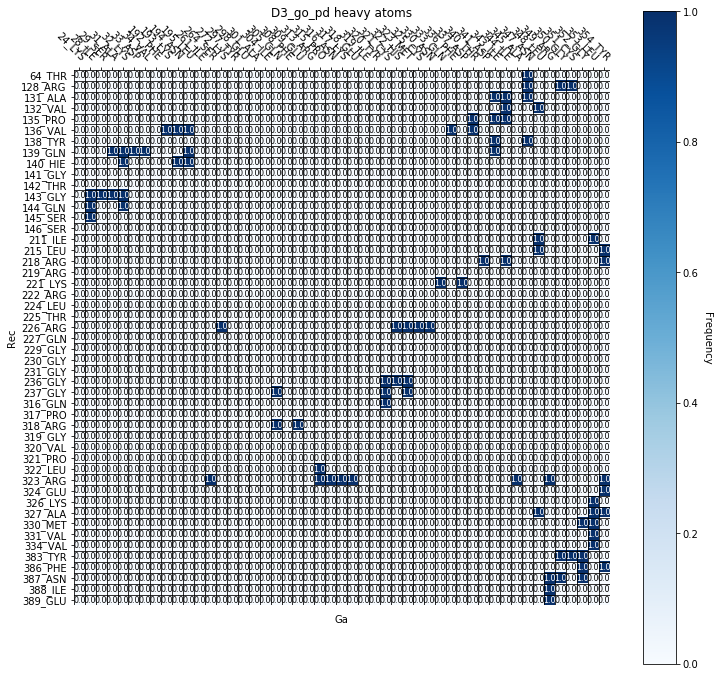

In [10]:
xlabels, ylabels, x_axis_label, y_axis_label = get_labels(u_2, common_rec, common_ga)

plt.figure(figsize=(12,12))
plot_index = 1
ax = plt.subplot(1, 1, plot_index)
im,cbar = heatmap(matrix_freq_2,xlabels, ylabels,ax=ax,cmap="Blues", cbarlabel="Frequency")
texts = annotate_heatmap(im, valfmt="{x:.1f}", size=8)
ax.set_title('D3_go_pd heavy atoms')
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)


Text(0, 0.5, 'Rec')

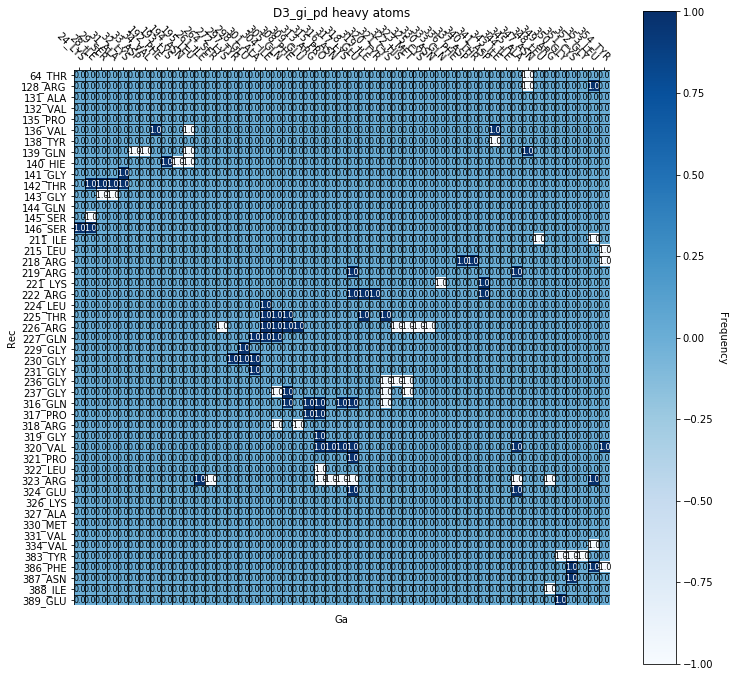

In [11]:
plt.figure(figsize=(12,12))
plot_index = 1
ax = plt.subplot(1, 1, plot_index)
im,cbar = heatmap(matrix_diff,xlabels, ylabels,ax=ax,cmap="Blues", cbarlabel="Frequency")
texts = annotate_heatmap(im, valfmt="{x:.1f}", size=8)
ax.set_title('D3_gi_pd heavy atoms')
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)